### Import Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import models, datasets, layers, optimizers
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve, precision_score, recall_score, f1_score, cohen_kappa_score, mean_squared_error

In [54]:
df1 = pd.read_csv('Processed_file.csv')
df1.head()

,Unnamed: 0,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,...,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,No
1,1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,...,No,0,5,No,0,No,4-Medium,Suburban,Professional,Yes
2,2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,...,No,0,6,No,0,No,3-Good,Town,Crafts,Yes
3,3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,...,No,0,6,No,0,No,4-Medium,Other,Other,No
4,4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,...,Yes,0,9,No,1,No,1-Highest,Other,Professional,Yes


In [55]:
df1.drop('Unnamed: 0', axis = 1, inplace = True)
df1.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,No,0,5,No,0,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,No,0,6,No,0,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,No,0,6,No,0,No,4-Medium,Other,Other,No
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,Yes,0,9,No,1,No,1-Highest,Other,Professional,Yes


In [56]:
df1.drop(['CustomerID', 'ServiceArea'], axis = 1, inplace = True)

In [57]:
y = df1['Churn']
y[:5]

0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [58]:
df_num = df1.select_dtypes(include = [np.number])
df_num.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1


In [59]:
df_num.drop('Churn', axis = 1, inplace = True)

In [60]:
df_cat = df1.select_dtypes(include = 'O')
df_cat.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes,1-Highest,Suburban,Professional,No
1,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,4-Medium,Suburban,Professional,Yes
2,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,No,3-Good,Town,Crafts,Yes
3,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,No,4-Medium,Other,Other,No
4,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,1-Highest,Other,Professional,Yes


In [61]:
dummy = pd.get_dummies(df_cat, drop_first=True)
dummy.head(2)

,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [62]:
#lets scale the data for the numerical data.
#Lets use the StandardScaler.

X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

df_num_scaled.head(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,-0.783096,-0.578622,-1.042504,-0.289052,-0.41379,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,...,0.146016,0.487086,-0.077010,1.395945,-0.869616,4.662897,-0.1283,-0.169283,-0.103411,-0.140707
1,-0.940828,-0.973610,-1.252478,-0.401392,-0.41379,-0.125718,0.029233,0.030066,-0.631532,-0.373230,...,0.146016,-0.616767,4.426588,0.391631,0.889077,-0.180167,-0.1283,-0.169283,0.215243,-0.140707


In [63]:
# Concating the scaled values and the dummy variables.
X = pd.concat([df_num_scaled, dummy], axis =1 )
X.head(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,-0.783096,-0.578622,-1.042504,-0.289052,-0.41379,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,...,0,0,0,0,1,0,0,0,0,0
1,-0.940828,-0.973610,-1.252478,-0.401392,-0.41379,-0.125718,0.029233,0.030066,-0.631532,-0.373230,...,0,0,0,0,1,0,0,0,0,1


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 68)
y_train (40837,)
X_test (10210, 68)
y_test (10210,)


### Estimator

In [65]:
def model_train_and_score(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)

    print("**************************************************")
    print("________"+estimator.__class__.__name__+"__________")
    print()
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}".format(precision_score(y_test, y_pred, average = 'weighted')))
    print("Recall: {}".format(recall_score(y_test, y_pred, average = 'weighted')))
    print("F1 Score: {}".format(f1_score(y_test, y_pred, average = 'weighted')))
    print()
    print('Classification Report on train data \n',classification_report(y_train,y_pred_train))
    print()
    print('Classification Report on test data \n',classification_report(y_test,y_pred))
    print()
    print("**************************************************")

**XGBoost Classifier**

In [66]:
model_train_and_score(XGBClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________XGBClassifier__________

Accuracy: 0.719588638589618
Precision: 0.6802981093156099
Recall: 0.719588638589618
F1 Score: 0.6736799706489262

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89     29028
           1       0.89      0.44      0.59     11809

    accuracy                           0.82     40837
   macro avg       0.85      0.71      0.74     40837
weighted avg       0.83      0.82      0.80     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83      7308
           1       0.52      0.20      0.29      2902

    accuracy                           0.72     10210
   macro avg       0.63      0.56      0.56     10210
weighted avg       0.68      0.72      0.67     10210


**************************************************


**Extreme ML model**

In [67]:
model_train_and_score(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________GradientBoostingClassifier__________

Accuracy: 0.7235063663075416
Precision: 0.6965692681256326
Recall: 0.7235063663075416
F1 Score: 0.63410780062573

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.72      0.99      0.84     29028
           1       0.69      0.08      0.14     11809

    accuracy                           0.72     40837
   macro avg       0.71      0.53      0.49     40837
weighted avg       0.72      0.72      0.64     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.98      0.84      7308
           1       0.62      0.07      0.13      2902

    accuracy                           0.72     10210
   macro avg       0.67      0.53      0.48     10210
weighted avg       0.70      0.72      0.63     10210


**************************************************


In [68]:
model_train_and_score(AdaBoostClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________AdaBoostClassifier__________

Accuracy: 0.720666013712047
Precision: 0.678045851313457
Recall: 0.720666013712047
F1 Score: 0.6444981617922055

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.73      0.97      0.83     29028
           1       0.56      0.11      0.18     11809

    accuracy                           0.72     40837
   macro avg       0.65      0.54      0.51     40837
weighted avg       0.68      0.72      0.64     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.97      0.83      7308
           1       0.55      0.10      0.17      2902

    accuracy                           0.72     10210
   macro avg       0.64      0.53      0.50     10210
weighted avg       0.68      0.72      0.64     10210


**************************************************


**Ensemble model(Voting Classifier)**

In [69]:
from sklearn.ensemble import VotingClassifier

estimator = [('RF',RandomForestClassifier()),
             ('GBC',GradientBoostingClassifier()),('Xgb',XGBClassifier())]

In [70]:
vot = VotingClassifier(estimators=estimator,voting='soft')
model_train_and_score(vot,X_train, y_train, X_test, y_test)

**************************************************
________VotingClassifier__________

Accuracy: 0.7256611165523996
Precision: 0.6949451937742326
Recall: 0.7256611165523996
F1 Score: 0.6479868624555115

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     29028
           1       0.99      0.59      0.74     11809

    accuracy                           0.88     40837
   macro avg       0.93      0.80      0.83     40837
weighted avg       0.90      0.88      0.87     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.97      0.84      7308
           1       0.60      0.10      0.18      2902

    accuracy                           0.73     10210
   macro avg       0.67      0.54      0.51     10210
weighted avg       0.69      0.73      0.65     10210


**************************************************


**Deep Learning model with 2 hidden layers**

In [71]:
ann4 = models.Sequential([
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

ann4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann4.fit(X_train, y_train, epochs=5)

Epoch 1/5
1277/1277 [==============================] - 1s 644us/step - loss: 0.6187 - accuracy: 0.7018
Epoch 2/5
1277/1277 [==============================] - 1s 653us/step - loss: 0.5858 - accuracy: 0.7114
Epoch 3/5
1277/1277 [==============================] - 1s 691us/step - loss: 0.5815 - accuracy: 0.7116
Epoch 4/5
1277/1277 [==============================] - 1s 647us/step - loss: 0.5775 - accuracy: 0.7129
Epoch 5/5
1277/1277 [==============================] - 1s 655us/step - loss: 0.5740 - accuracy: 0.7135


In [72]:
ann4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 68)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8832      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 26634 (104.04 KB)
Trainable params: 2663

In [73]:
ann4.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, Ann_accuracy = ann4.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {Ann_accuracy}")

Epoch 1/10
1277/1277 [==============================] - 1s 800us/step - loss: 0.5715 - accuracy: 0.7154 - val_loss: 0.5722 - val_accuracy: 0.7154
Epoch 2/10
1277/1277 [==============================] - 1s 751us/step - loss: 0.5676 - accuracy: 0.7160 - val_loss: 0.5714 - val_accuracy: 0.7169
Epoch 3/10
1277/1277 [==============================] - 1s 729us/step - loss: 0.5649 - accuracy: 0.7166 - val_loss: 0.5732 - val_accuracy: 0.7177
Epoch 4/10
1277/1277 [==============================] - 1s 741us/step - loss: 0.5616 - accuracy: 0.7194 - val_loss: 0.5688 - val_accuracy: 0.7185
Epoch 5/10
1277/1277 [==============================] - 1s 737us/step - loss: 0.5586 - accuracy: 0.7202 - val_loss: 0.5765 - val_accuracy: 0.7075
Epoch 6/10
1277/1277 [==============================] - 1s 773us/step - loss: 0.5567 - accuracy: 0.7224 - val_loss: 0.5733 - val_accuracy: 0.7164
Epoch 7/10
1277/1277 [==============================] - 1s 746us/step - loss: 0.5542 - accuracy: 0.7248 - val_loss: 0.5718 -

In [74]:
# Even the deep learning model with 2 hidden layers is giving is 72% accuracy.

**Scorecard**

In [75]:
scorecard=pd.DataFrame(columns=['Model','Precision','Recall','F1_score','Train_Accuracy','Test_Accuracy','Kappa_score','RMSE'])
def model_accuracy(model_name,classifier,X_train,y_train,X_test,y_test):
    
    # traing data 
    model=classifier.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    #testing data
    y_test_pred=model.predict(X_test)
    
    Train_accuracy=model.score(X_train,y_train)
    Test_accuracy=model.score(X_test,y_test)
    
    global scorecard
    scorecard=scorecard.append({'Model':model_name
                               ,'Precision':precision_score(y_test,y_test_pred, average = 'weighted')
                               ,'Recall':recall_score(y_test,y_test_pred, average = 'weighted')
                               ,'F1_score':f1_score(y_test,y_test_pred, average = 'weighted')
                               ,'Train_Accuracy':Train_accuracy
                               ,'Test_Accuracy':Test_accuracy
                               ,'Kappa_score':cohen_kappa_score(y_test,y_test_pred),
                               'RMSE':np.sqrt(mean_squared_error(y_test, y_test_pred))},ignore_index=True
                              )

In [76]:
model_accuracy('Random Forest', RandomForestClassifier(), X_train, y_train, X_test, y_test)

In [77]:
model_accuracy('Voting Classifier', vot, X_train, y_train, X_test, y_test)

In [78]:
model_accuracy('Adaboost', AdaBoostClassifier(), X_train, y_train, X_test, y_test)

In [79]:
model_accuracy('Gradient boost', GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

In [80]:
model_accuracy('Xgb', XGBClassifier(), X_train, y_train, X_test, y_test)

In [81]:
scorecard

,Model,Precision,Recall,F1_score,Train_Accuracy,Test_Accuracy,Kappa_score,RMSE
0,Random Forest,0.693092,0.724094,0.640852,1.000000,0.724094,0.085969,0.525268
1,Voting Classifier,0.698095,0.726934,0.651029,0.881284,0.726934,0.108239,0.522557
2,Adaboost,0.678046,0.720666,0.644498,0.718001,0.720666,0.090781,0.528521
3,Gradient boost,0.696569,0.723506,0.634108,0.723780,0.723506,0.072594,0.525827
4,Xgb,0.680298,0.719589,0.673680,0.822245,0.719589,0.156763,0.529539


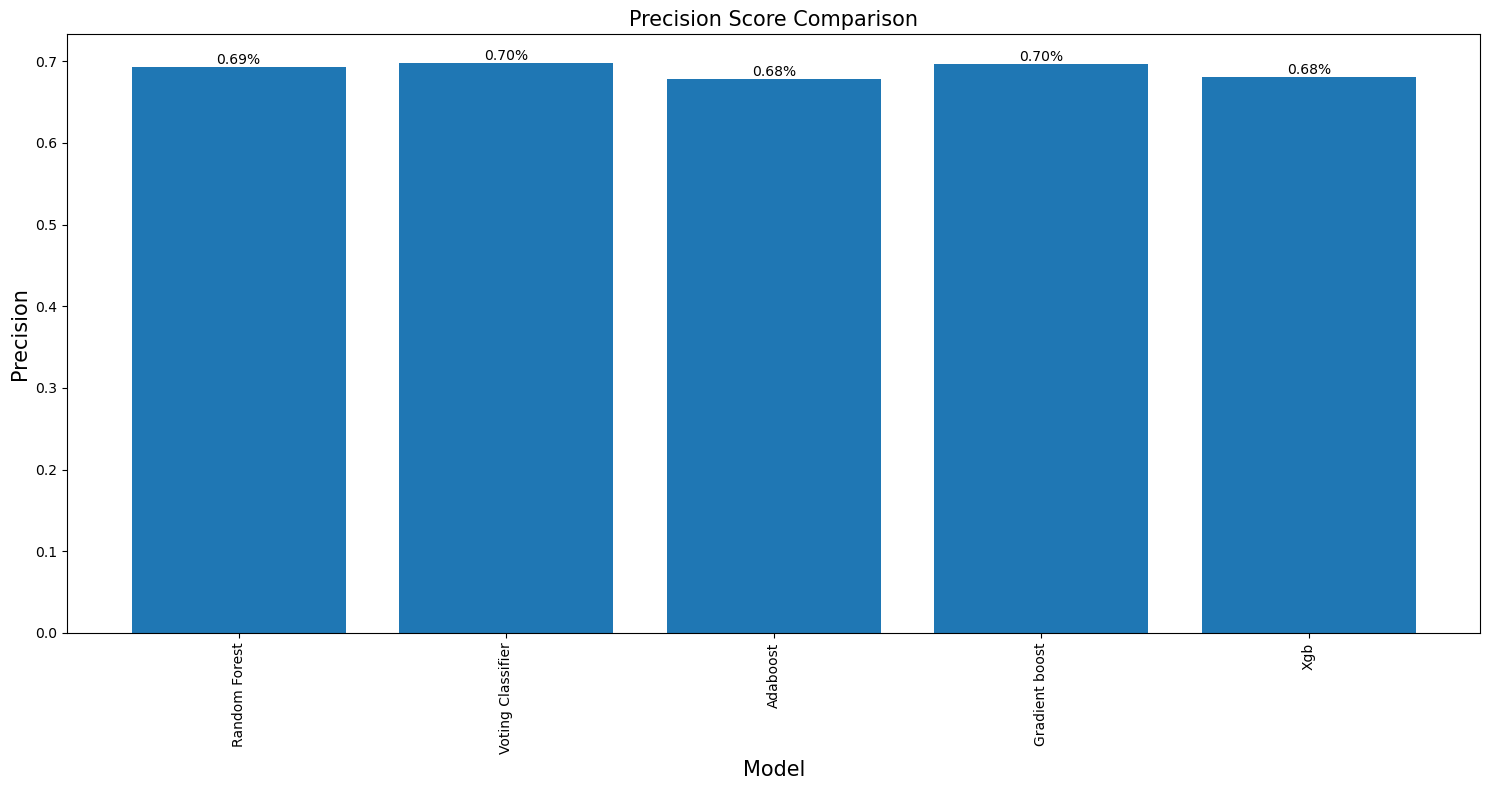

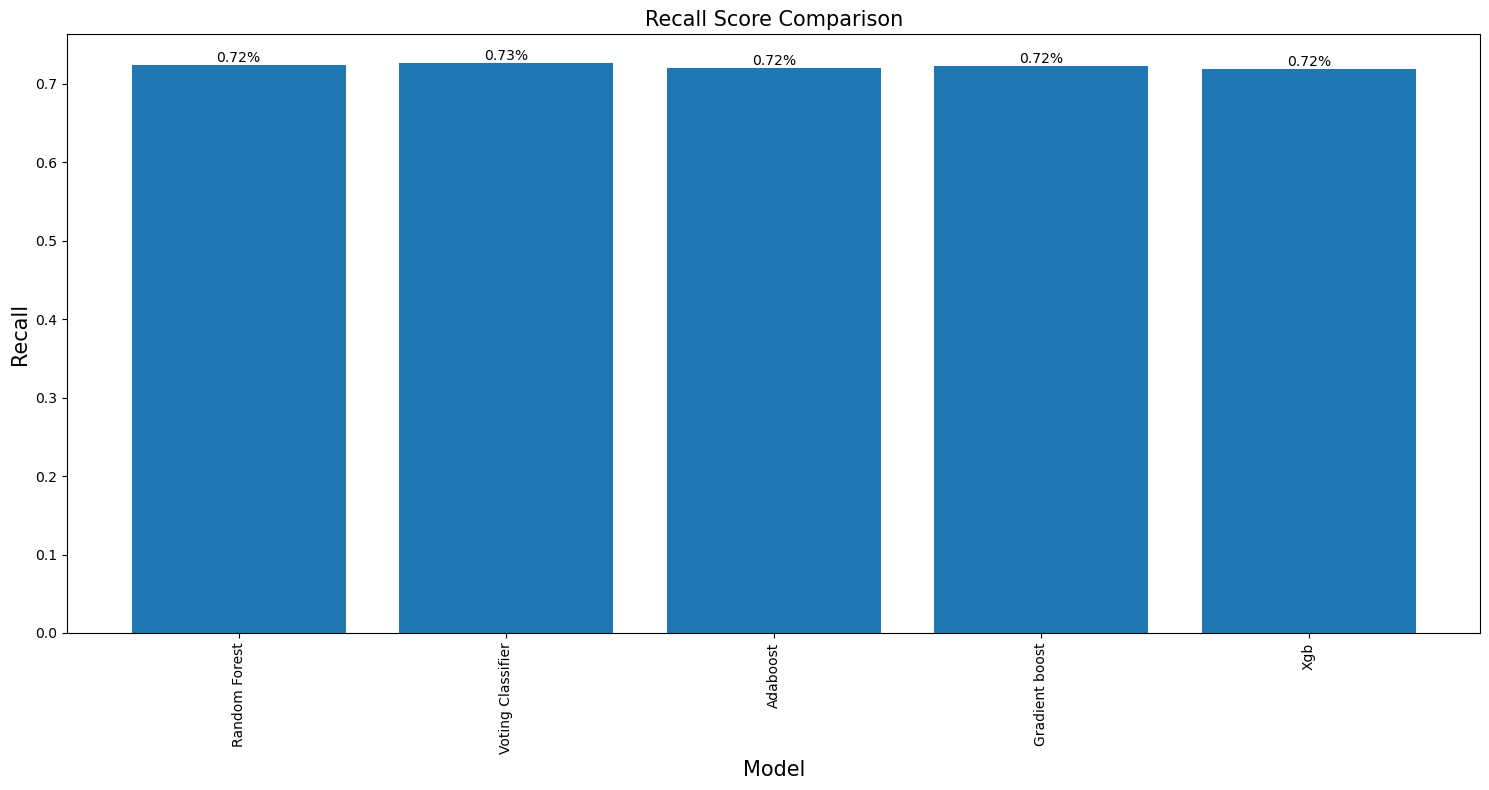

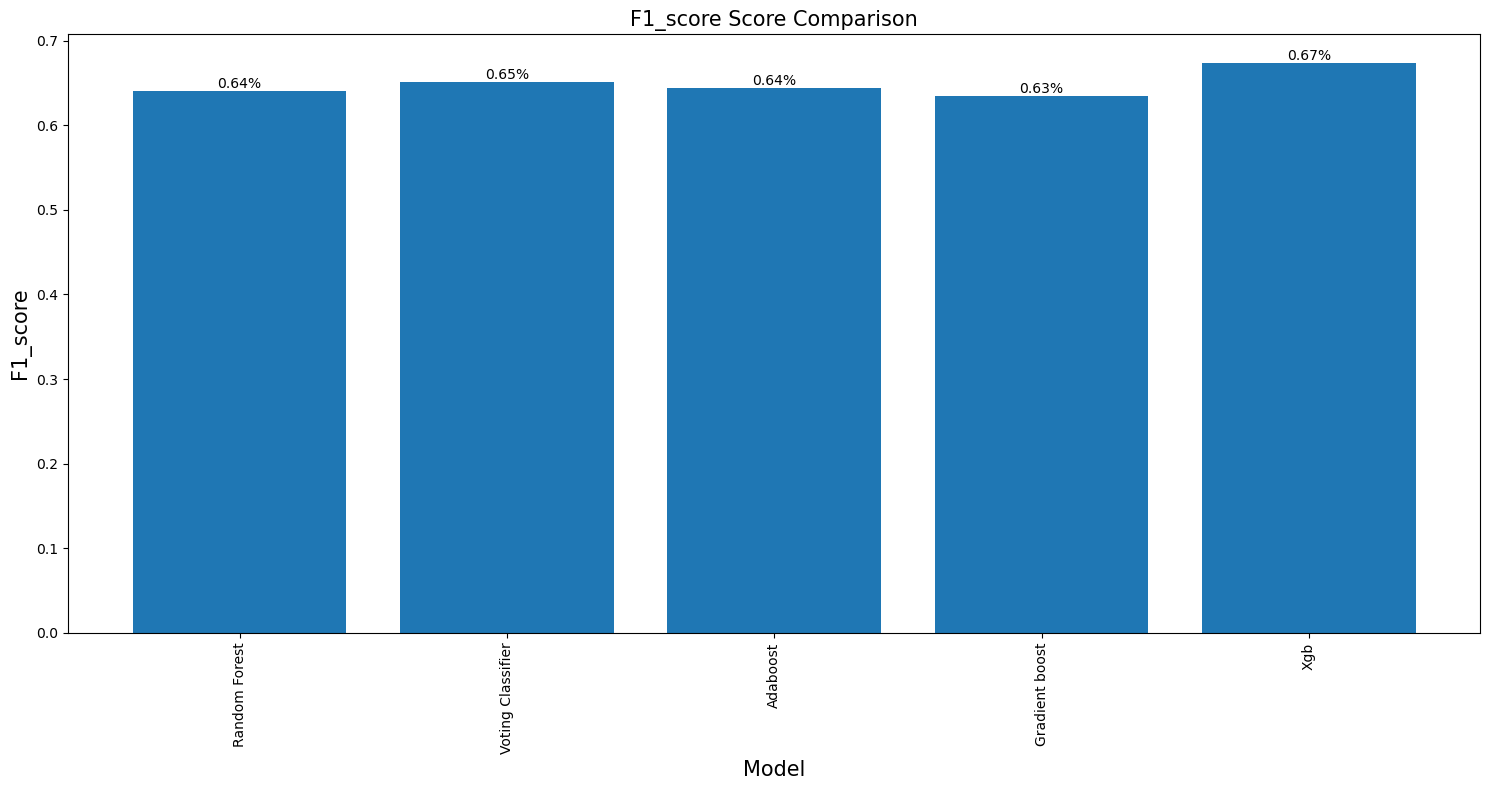

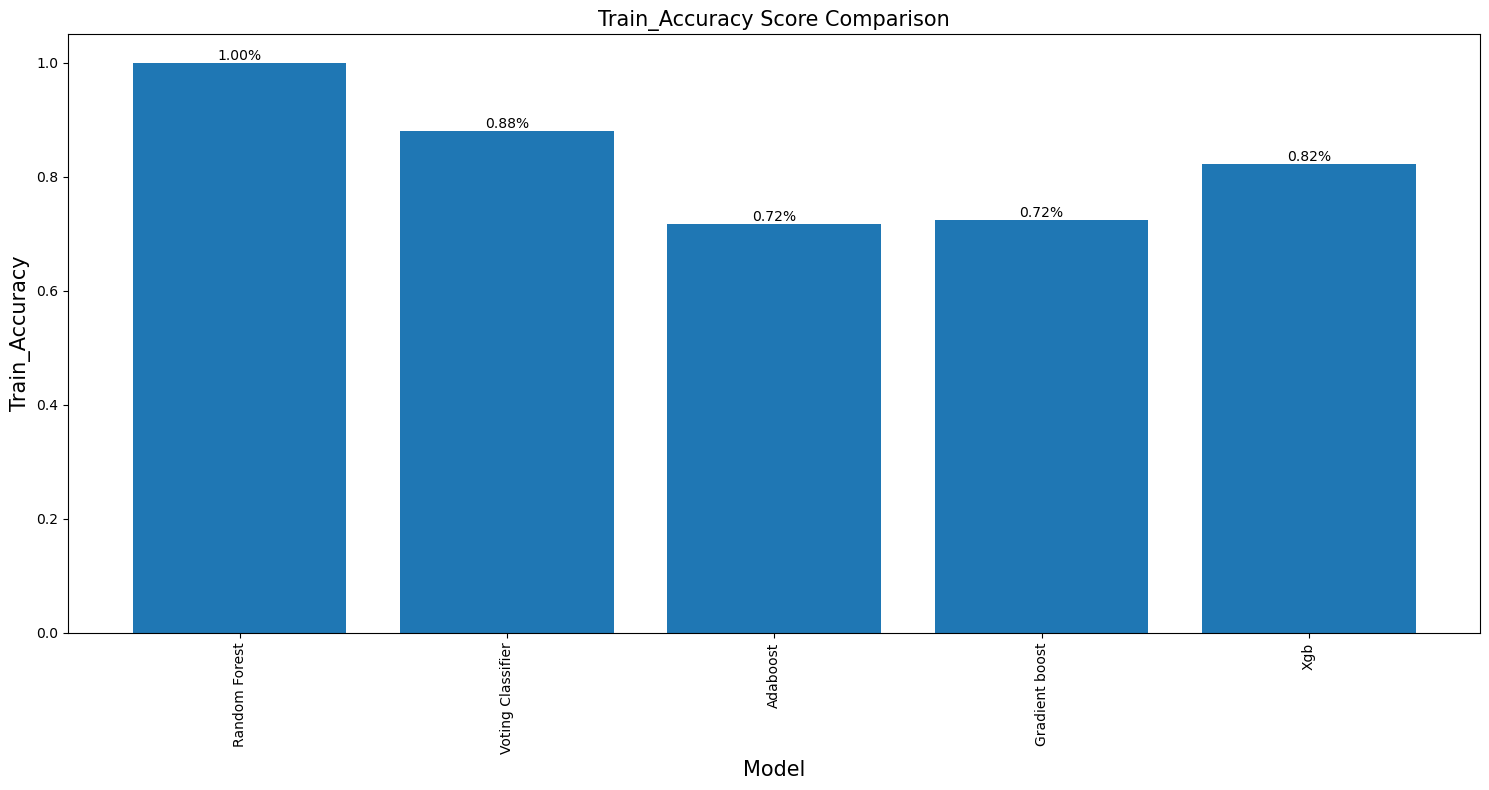

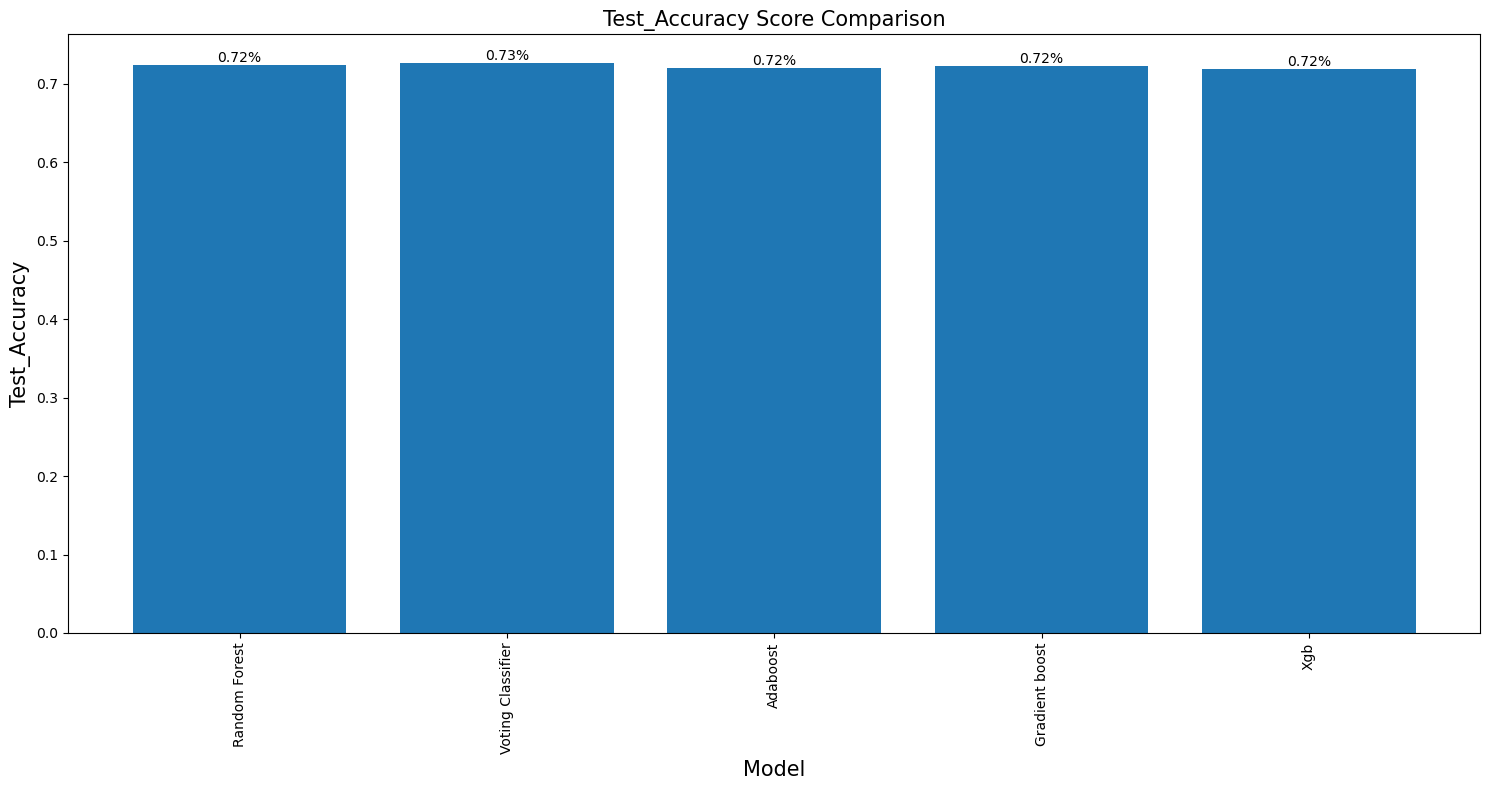

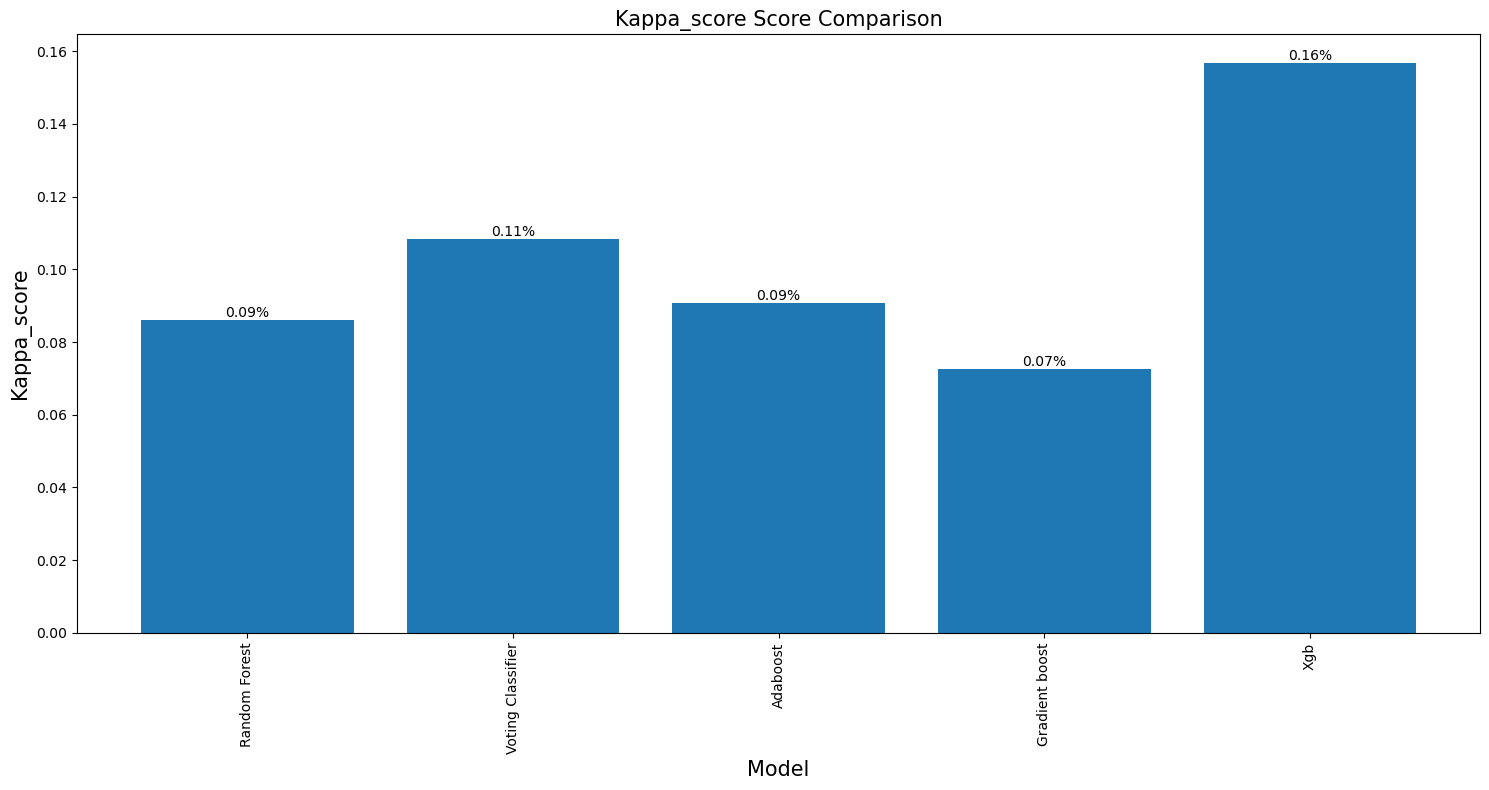

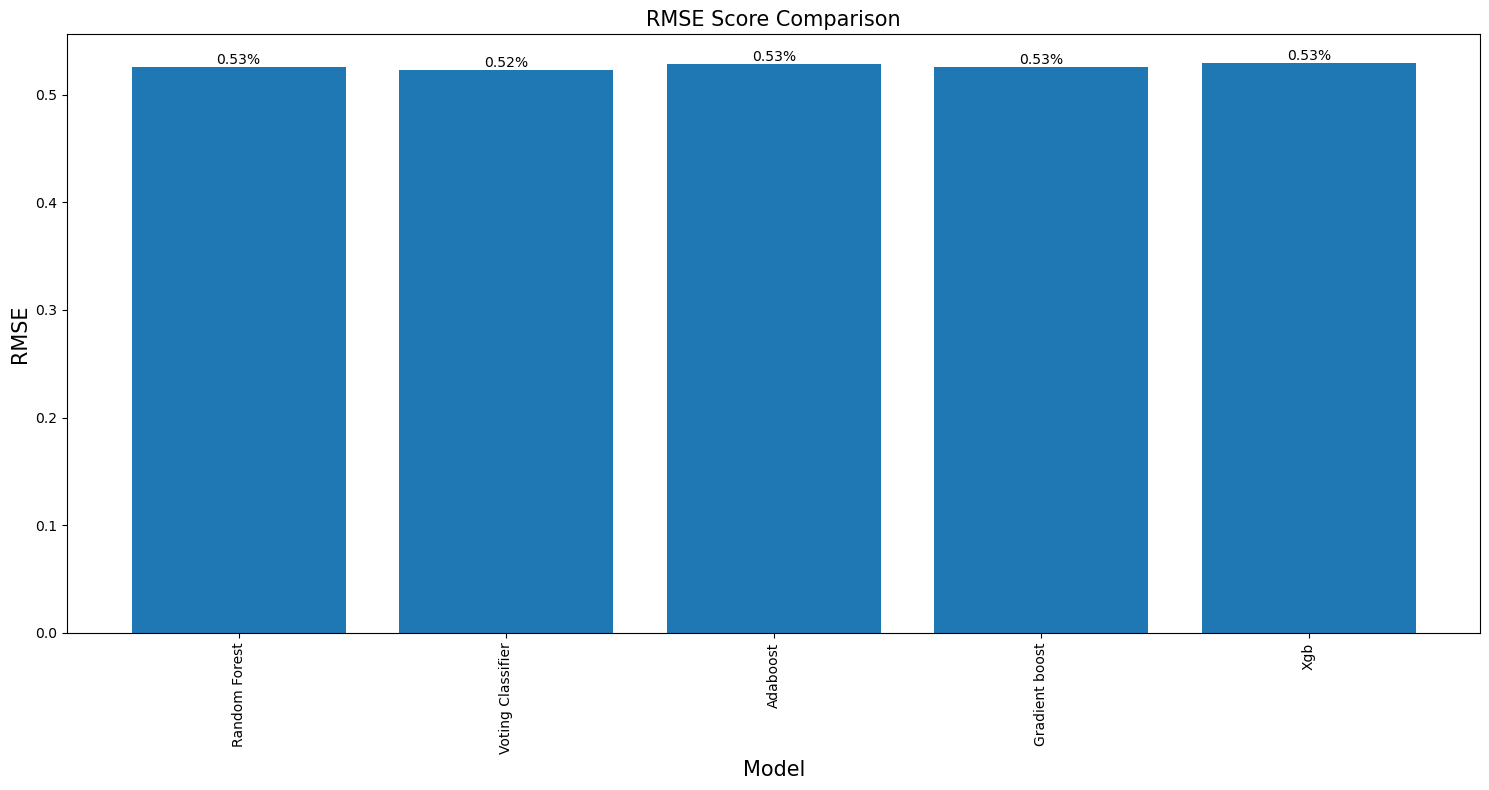

In [82]:
for j in scorecard.columns[1:]:
    plt.bar(scorecard['Model'], scorecard[j])
    for i, value in enumerate(scorecard[j]):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.xlabel('Model', fontsize = 15)
    plt.ylabel(j,fontsize = 15)
    plt.title(j + ' Score Comparison', fontsize = 15)

    plt.tight_layout()
    plt.show()

`Inference`:
    
   - From the above graphs, we can see there is a difference between train accuracies and also kappa score, remaining all the values having the same values. 
   - Mainly the accuracy and F1_score have has the same values for all the models.

### Bias Variance tradeoff

In [83]:
models1 = []
models1.append(('AdaBoost Classifier',AdaBoostClassifier()))
models1.append(('GradientBoosting Classifier',GradientBoostingClassifier()))
models1.append(('Voting Classifier',vot))
models1.append(('XGB Classifier',XGBClassifier()))
models1.append(('Random Forest',RandomForestClassifier()))

In [84]:
results = []
names = []
for name, model in models1:
    kfold = KFold(shuffle=True,n_splits=3,random_state=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s: Bias error: %f Variance error: (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

AdaBoost Classifier: Bias error: 0.361869 Variance error: (0.001331)
GradientBoosting Classifier: Bias error: 0.370705 Variance error: (0.001848)
Voting Classifier: Bias error: 0.355793 Variance error: (0.001133)
XGB Classifier: Bias error: 0.332069 Variance error: (0.002129)
Random Forest: Bias error: 0.368707 Variance error: (0.000888)


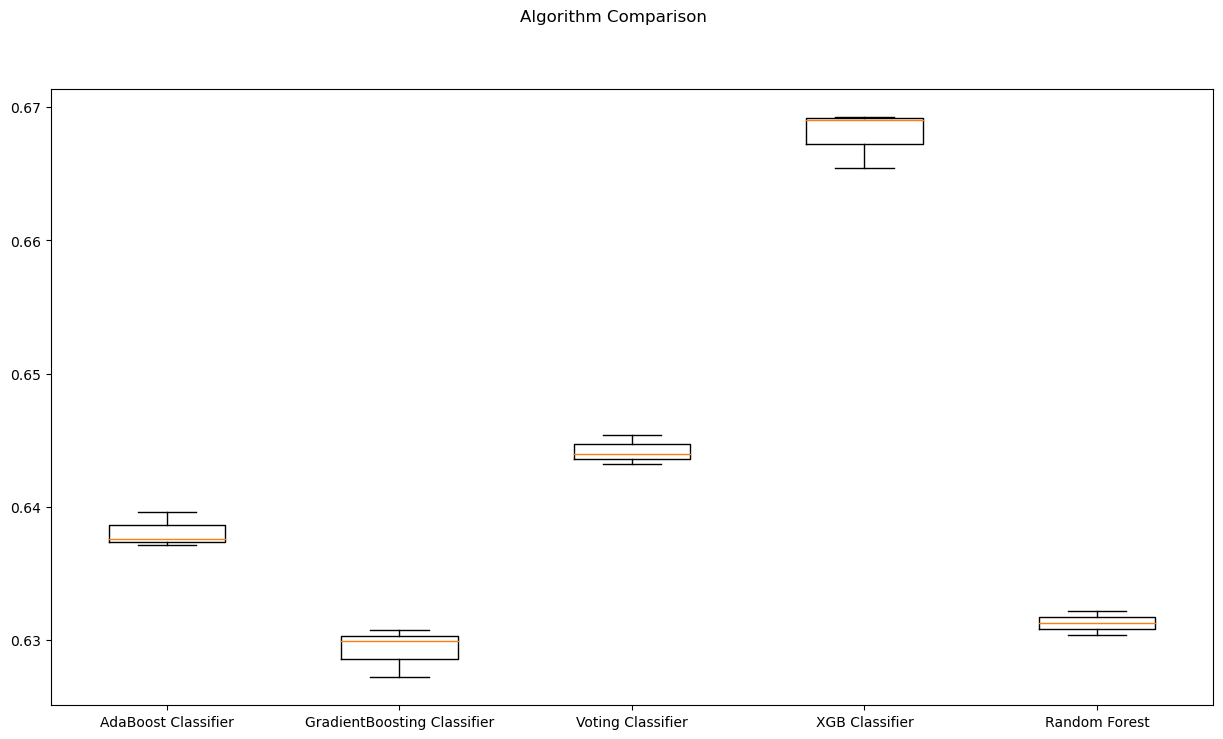

In [85]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

`Inference`:
    
- XGBClassifier has the lowest bias error but little more variance error.
- We have to comprimise bias or variance depending on the problem statement.